#### Description:

This file compares Multi-Objective Genetic Algorithm (MOGA) parameters. This involves testing

1. If object weights matter absolutely, or if they can be compared relatively (all 0.1 vs all 1.0)
2. the optimal weights for the objective functions, relative to prediction_weight (0.5)
3. divergence_methods and diversity_methods
4. and evaluating the DEAP MOGA selection methods.

In [1]:
import numpy as np

from GA.MogaGeneticAlgorithm import MogaGeneticAlgorithm
from GA.Operators.MogaSelectionMethod import MogaSelectionMethod
from function_modules.function_module import *
from function_modules import moga_function_module

In [2]:
# Shared directory to save results 
shared_data_dir = 'Data/MOGA/'

# Shared GA parameters
kwargs = {
    'cnn_model_path': '../../Models/CNN_6_1_2.keras',
    'masked_sequence': 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG',
    'seed': 0,
}

# Testing parameters
target_expressions = [0, 0.5, 1]
lineages = 10
test_cases = 11

In [ ]:
# Evaluate all MOGA selection methods, including lexicase and non-dominant sorting selection methods

all_selection_methods = [
    # lexicase
    'selLexicase',
    'selAutomaticEpsilonLexicase',

    # non-dominant sorting
    'selNSGA2',
    'selNSGA3',
    'selNSGA3WithMemory',
    'selSPEA2',
    'sortNondominated',
    'sortLogNondominated',
    'selTournamentDCD',
    'uniform_reference_points'
]

param_ranges = {
    'prediction_weight' : [1.0],
    'divergence_weight' : [1.0],
    'diversity_weight' : [1.0],
    'selection_method' : all_selection_methods,
}
results_df = moga_function_module.test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}initial_comparison.csv')

Processing combinations:   0%|          | 0/240 [00:00<?, ?it/s]

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 240/240 [25:47<00:00,  6.45s/it, Elapsed=25.79min, ETA=0.00s]   


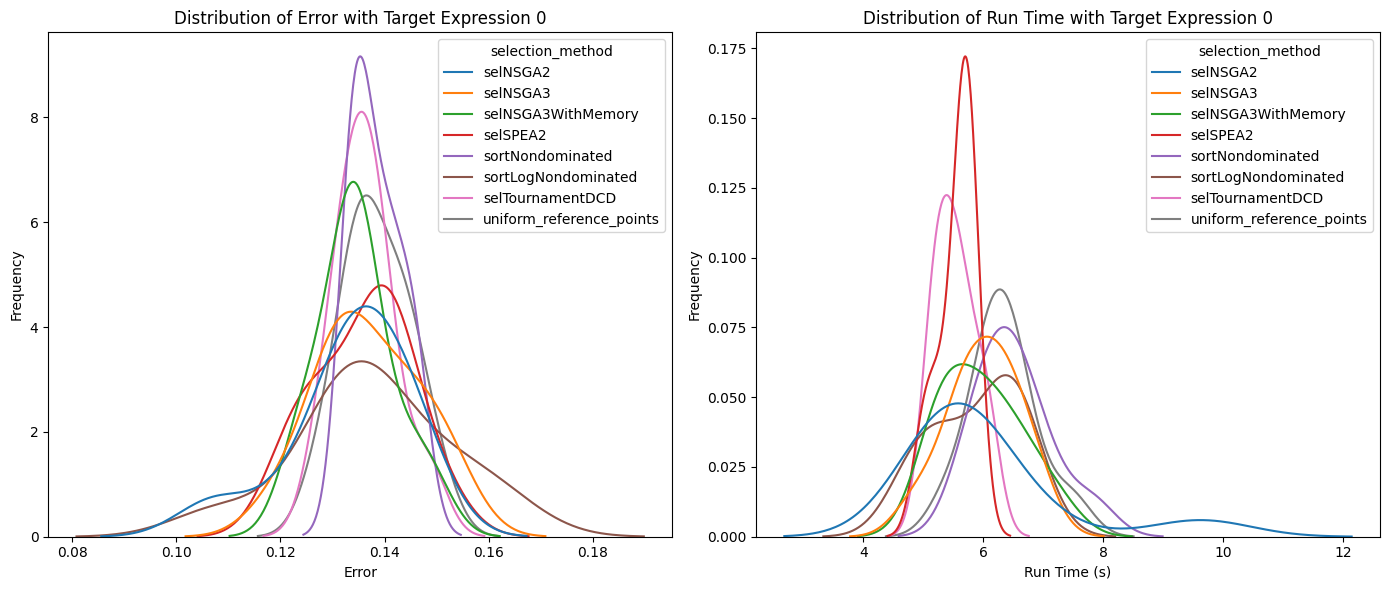

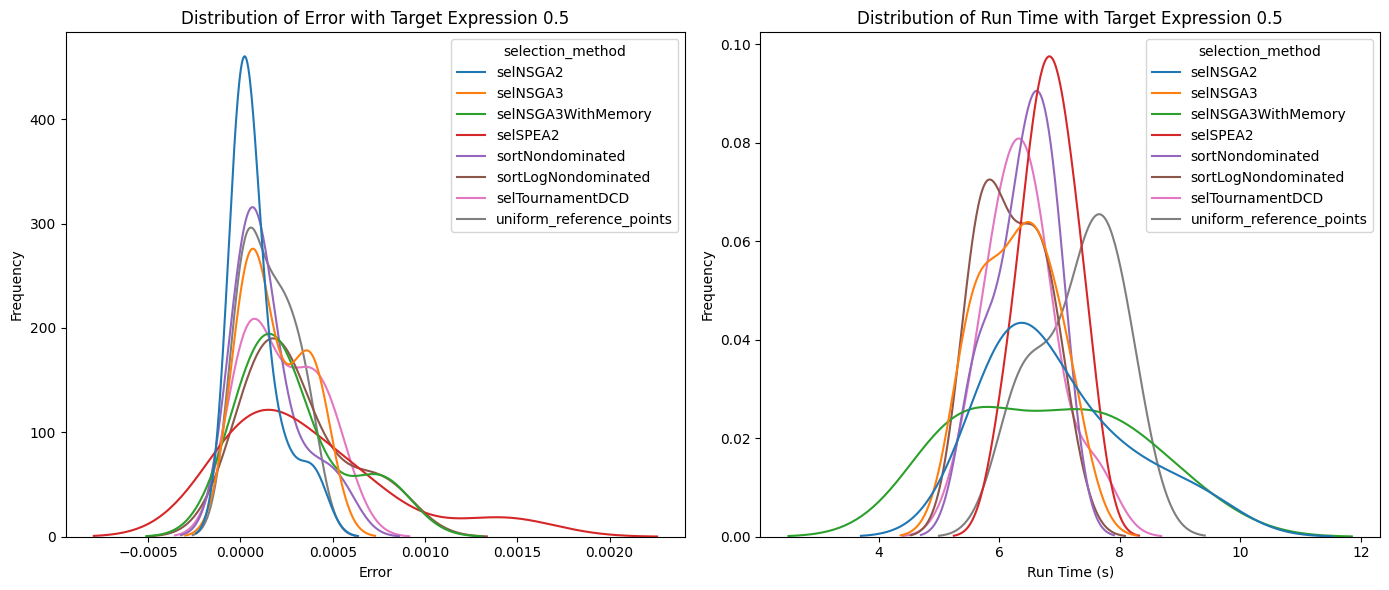

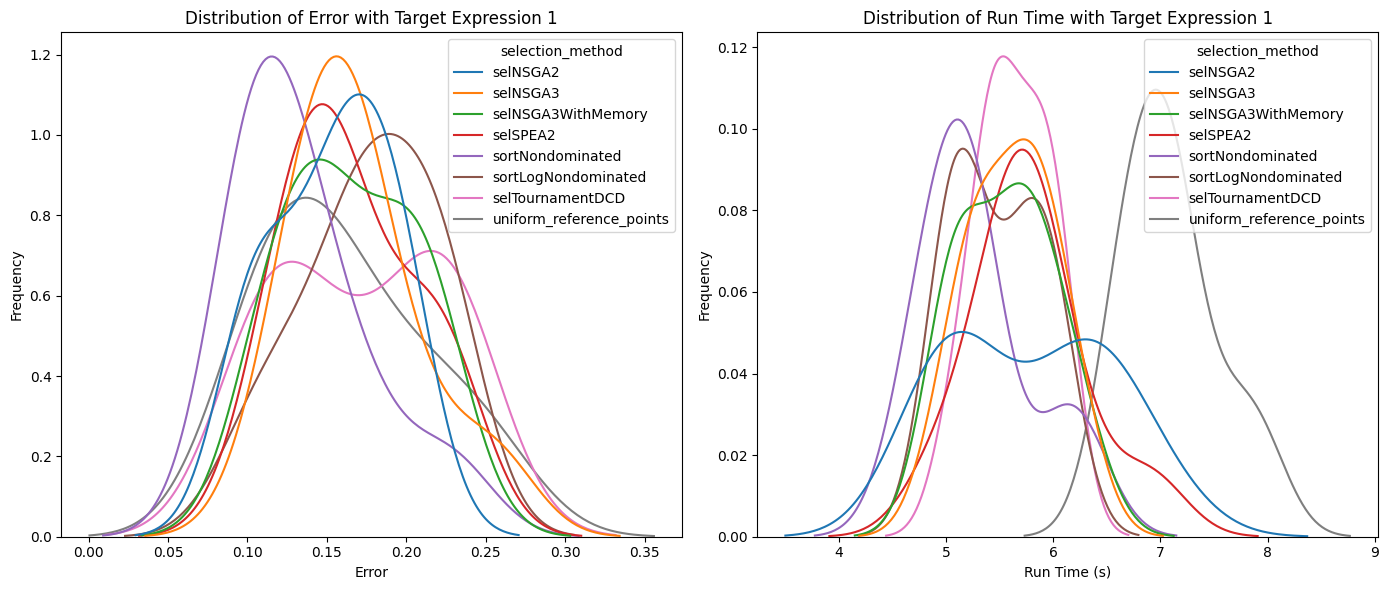

In [ ]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    distribution_plot(filtered_df, target_expression, 'selection_method')

In [3]:
# Test to see if different weights (0.1, 0.5, 1.0) for all objectives has the same convergence
param_ranges = {
    'prediction_weight' : [0.1],
    'divergence_weight' : [0.1],
    'diversity_weight' : [0.1],
}
results_df_01 = moga_function_module.test_params(param_ranges, target_expressions, lineages, kwargs, iteration=1)

# Evaluate mutLinear
param_ranges = {
    'prediction_weight' : [0.5],
    'divergence_weight' : [0.5],
    'diversity_weight' : [0.5],
}
results_df_05 = moga_function_module.test_params(param_ranges, target_expressions, lineages, kwargs, iteration=2)

# Evaluate mutExponential
param_ranges = {
    'prediction_weight' : [1.0],
    'divergence_weight' : [1.0],
    'diversity_weight' : [1.0],
}
results_df_10 = moga_function_module.test_params(param_ranges, target_expressions, lineages, kwargs, iteration=3)

# Concatenate all results, save to csv
results_df = pd.concat([results_df_01, results_df_05, results_df_10])
results_df.to_csv(f'{shared_data_dir}weight_comparison_1.csv')

Processing combinations:   0%|          | 0/30 [00:00<?, ?it/s]

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 30/30 [02:03<00:00,  4.10s/it, Elapsed=2.05min, ETA=0.00s]  


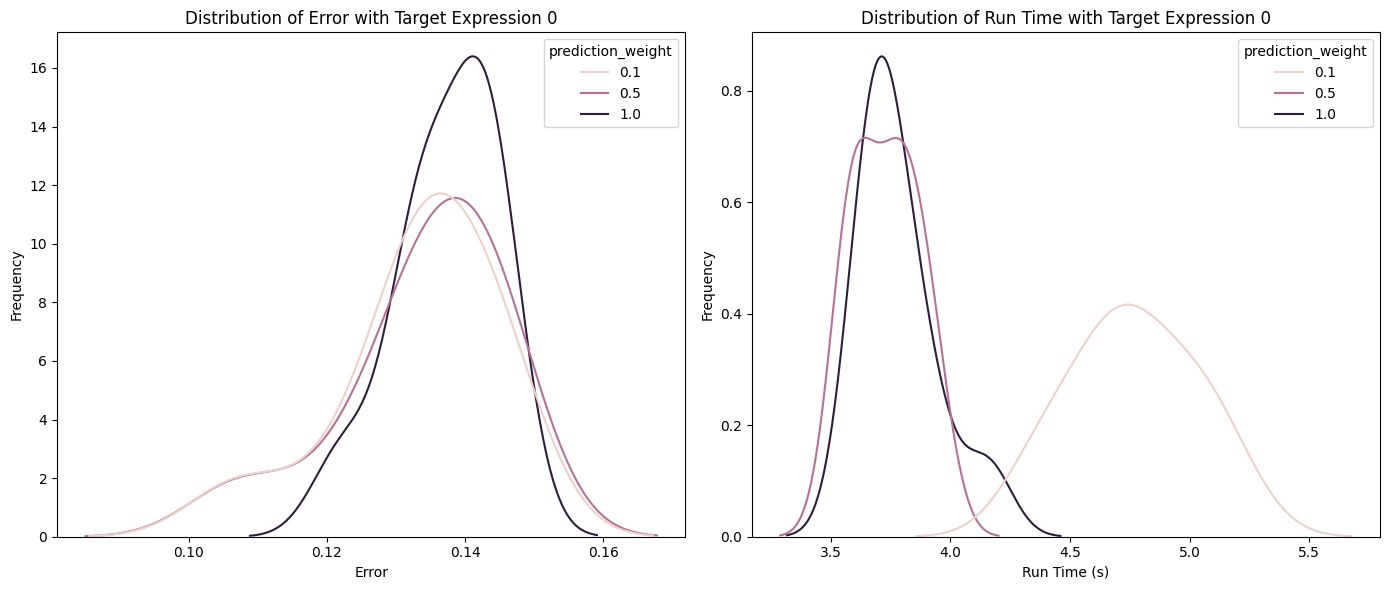

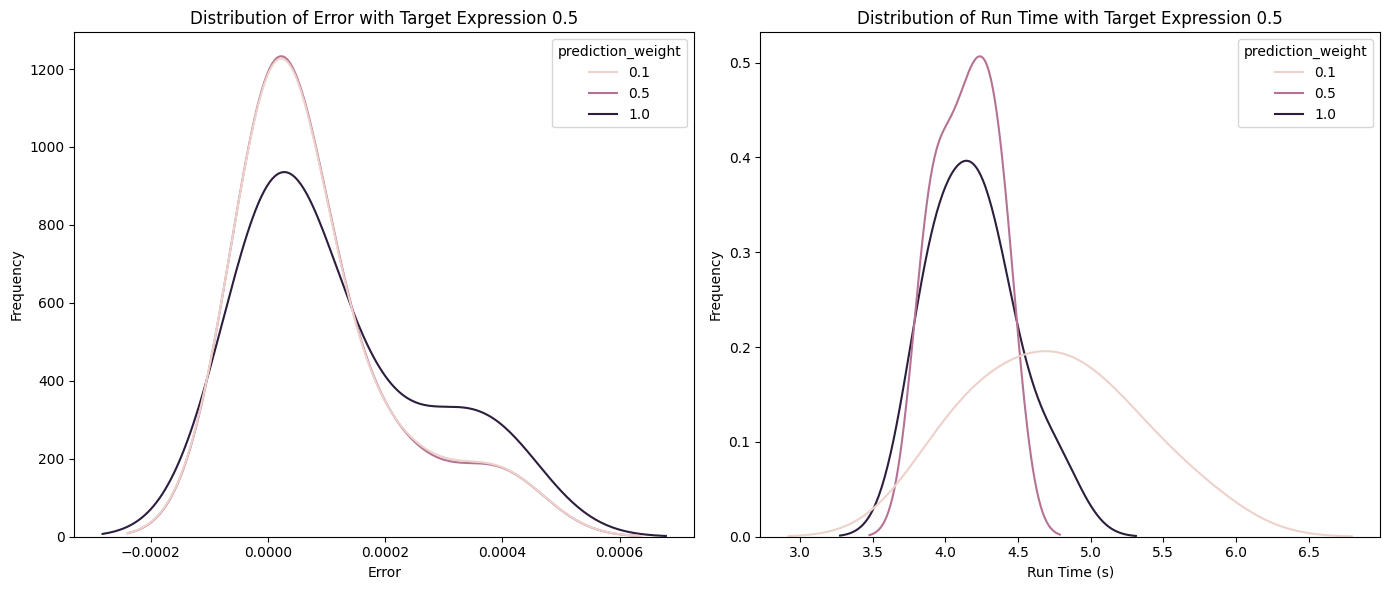

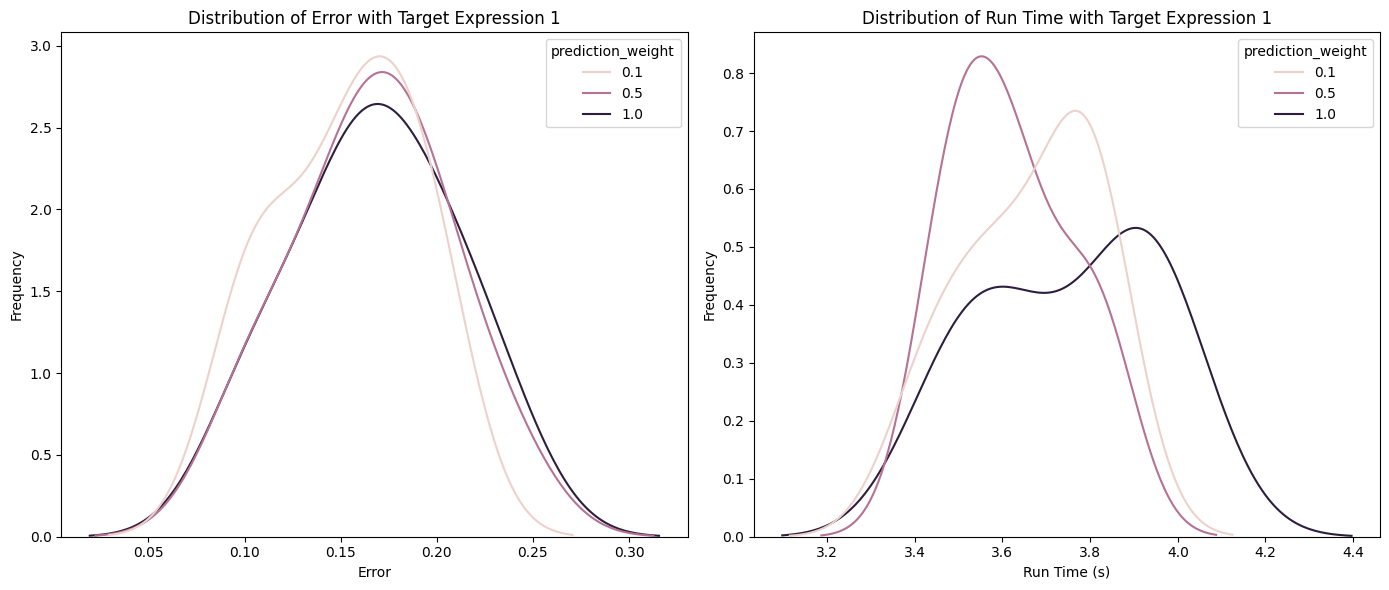

In [4]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    distribution_plot(filtered_df, target_expression, 'prediction_weight')

In [5]:
# Run for sortNondominated, varying divergence_weight and diversity_weight. Prediction_weight is fixed at 0.5 so that all objectives are relative to prediction_weight.

param_ranges = {
    'selection_method' : ['sortNondominated'],
    'prediction_weight': [0.5],
    'divergence_weight': np.linspace(0, 1, test_cases),
    'diversity_weight': np.linspace(0, 1, test_cases),
}
results_df = moga_function_module.test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}weight_comparison_2.csv')

Processing combinations:   0%|          | 0/3630 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 3630/3630 [4:36:13<00:00,  4.57s/it, Elapsed=4.60h, ETA=0.00s]     


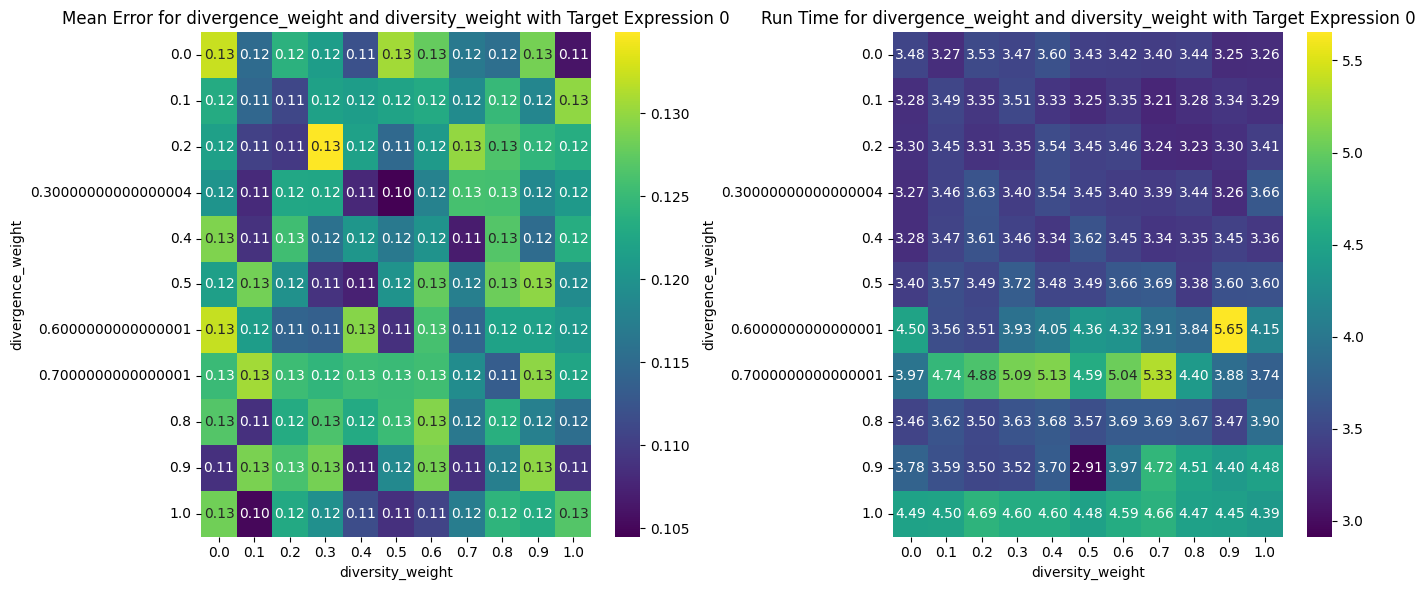

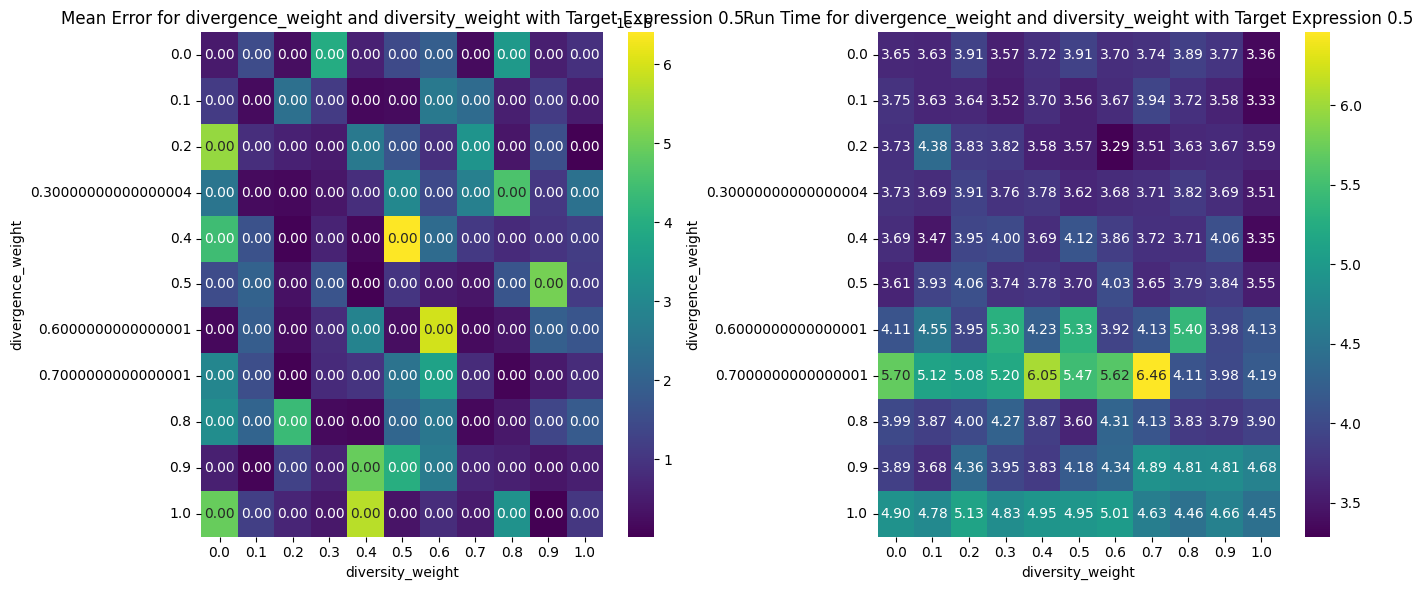

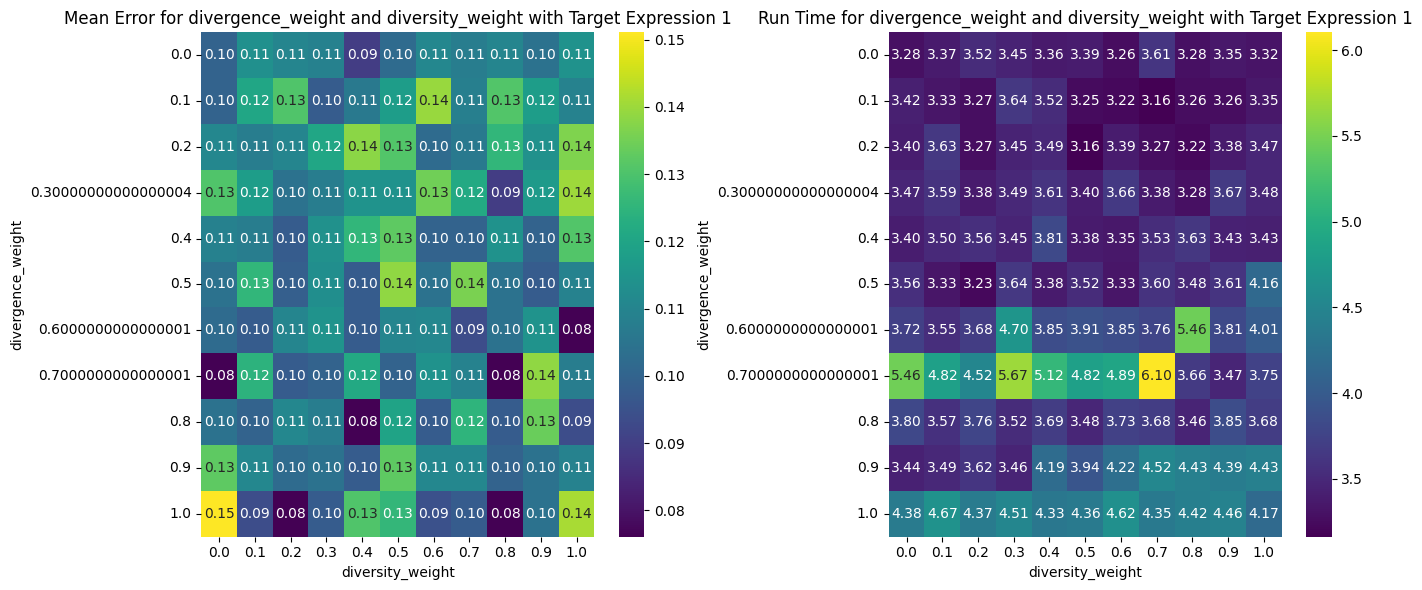

In [6]:
# This version only graphs the minimum value for each combination of divergence_weight and diversity_weight

for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    filtered_df = filtered_df.groupby(['divergence_weight', 'diversity_weight']).min().reset_index()
    heatmap(filtered_df, target_expression, 'divergence_weight', 'diversity_weight')

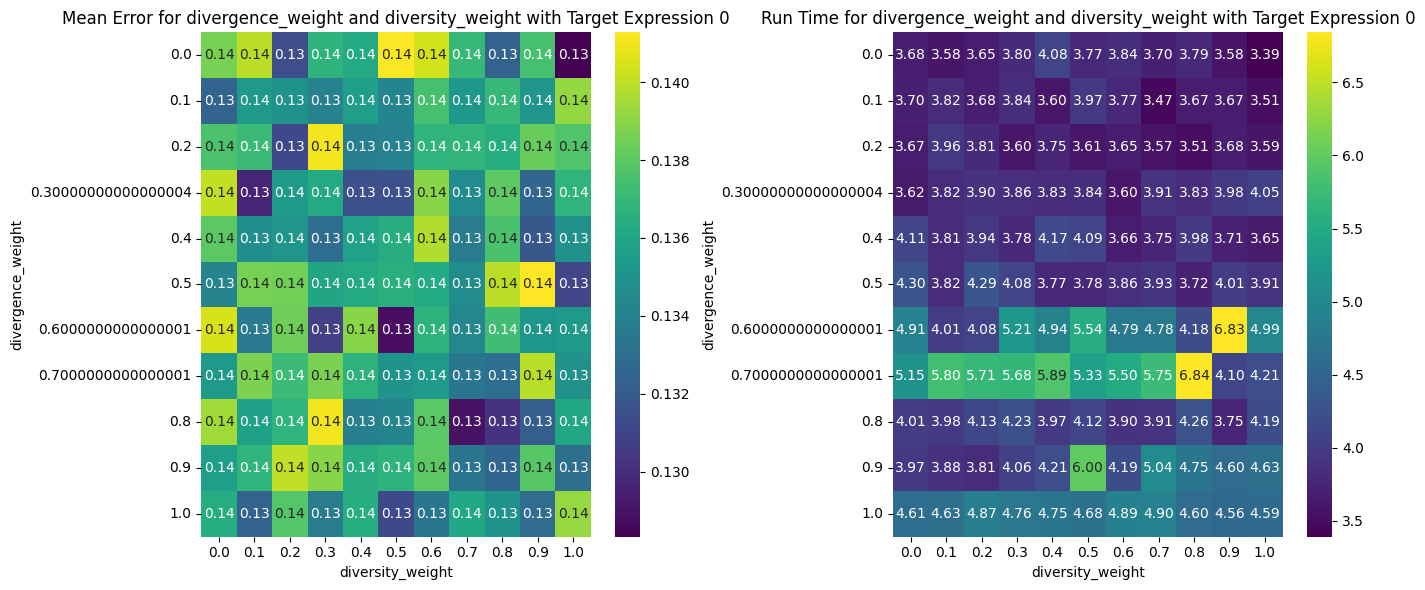

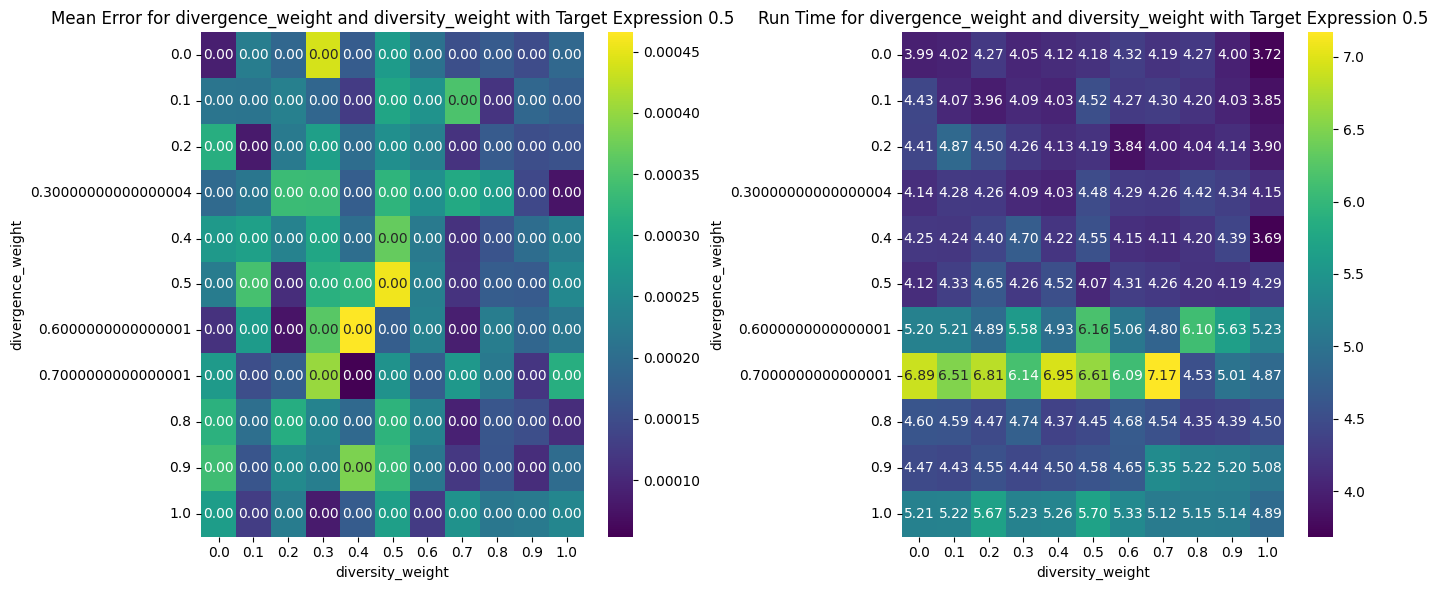

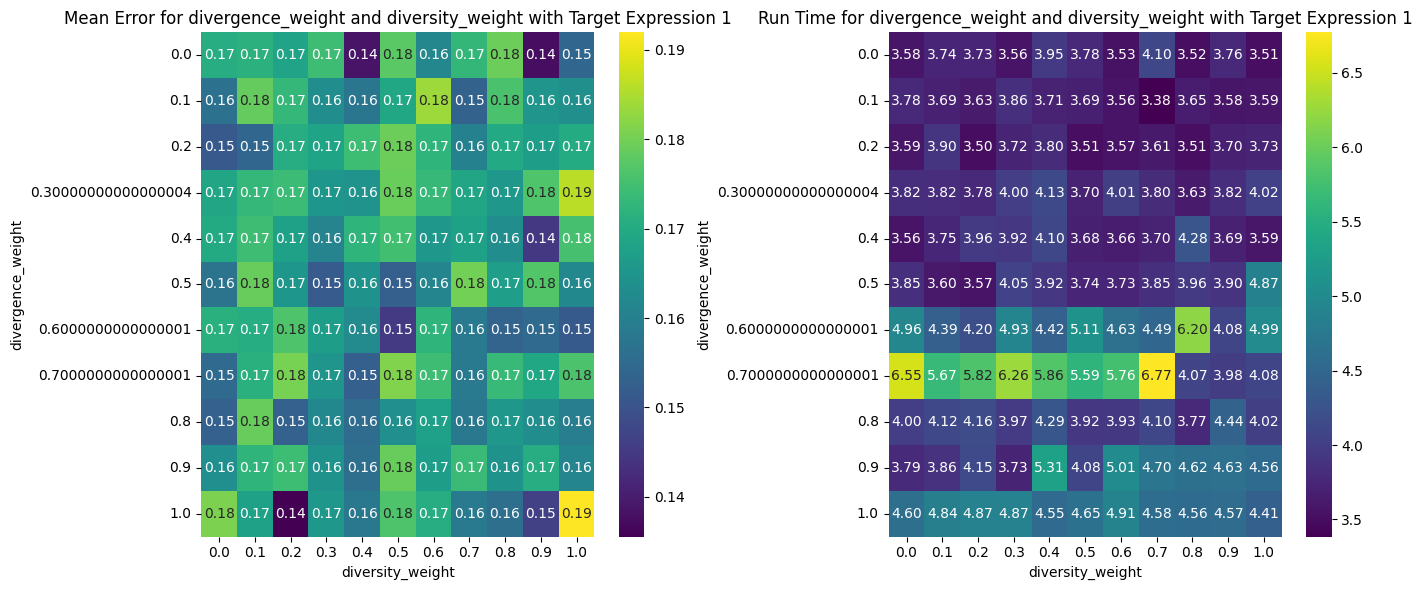

In [7]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    heatmap(filtered_df, target_expression, 'divergence_weight', 'diversity_weight')

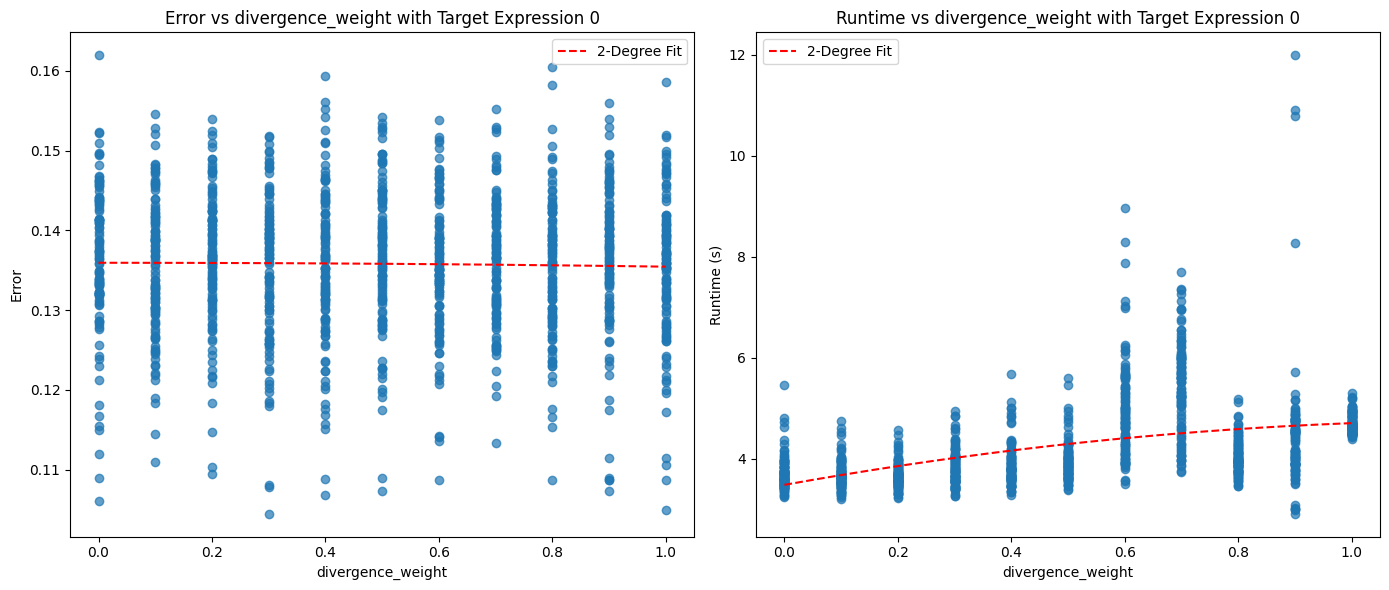

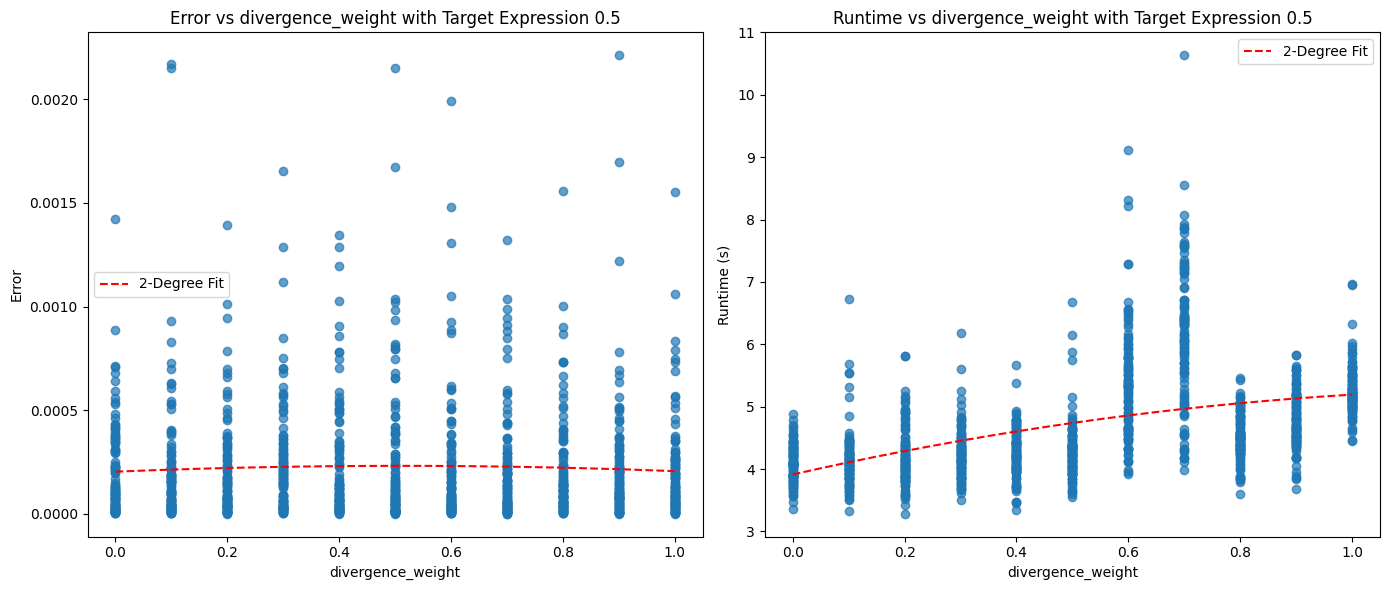

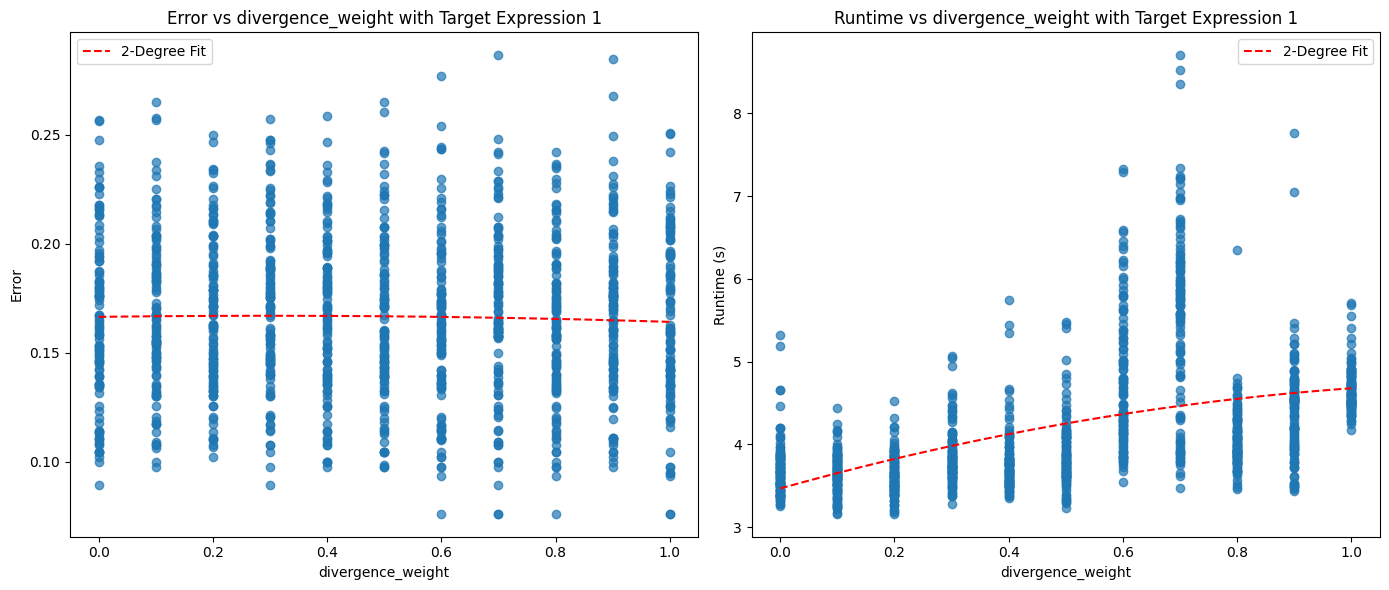

In [8]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'divergence_weight', polynomial_degree=2)

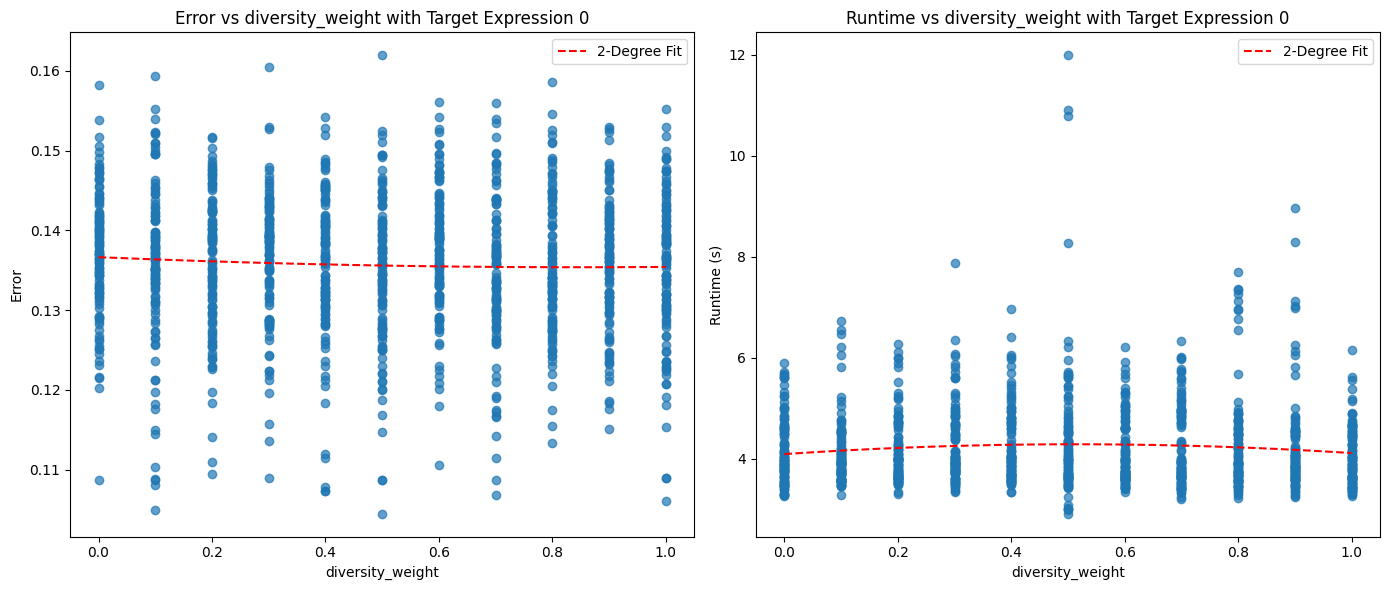

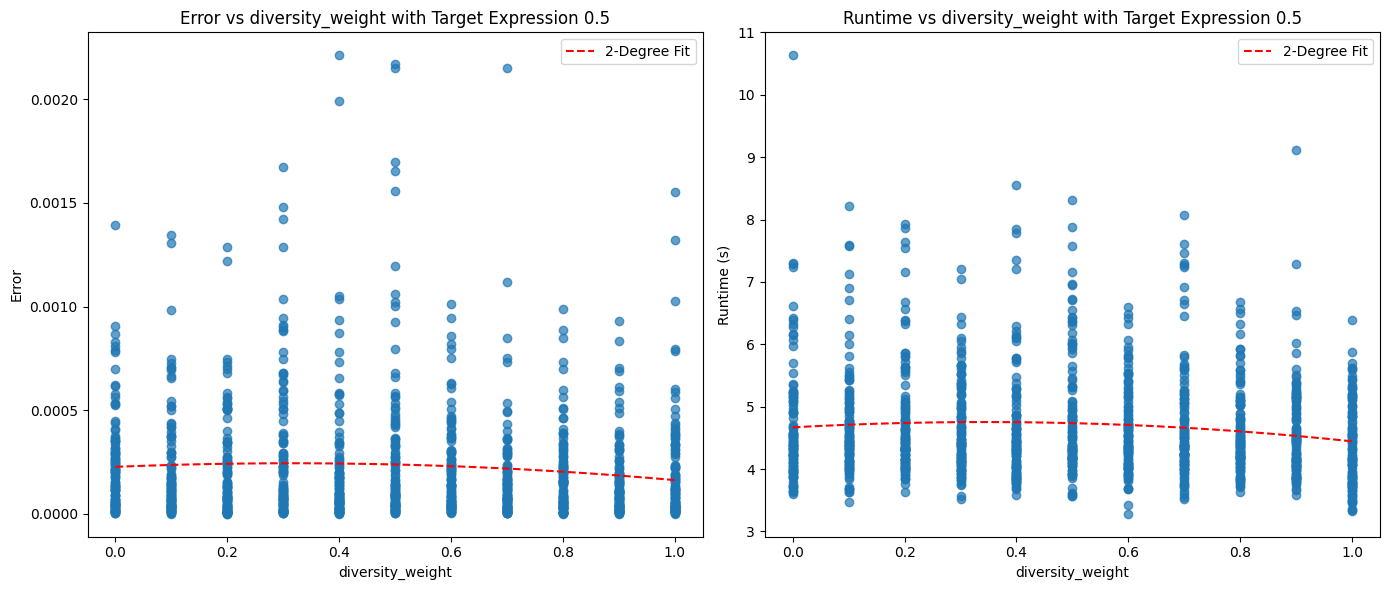

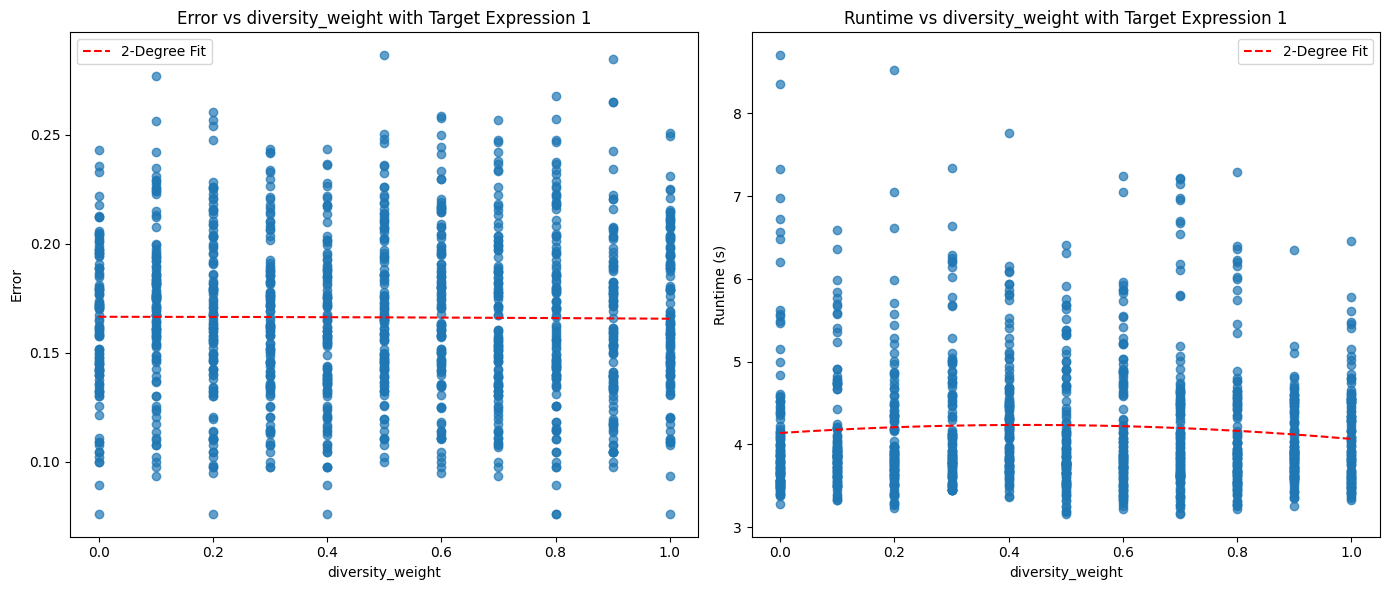

In [9]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'diversity_weight', polynomial_degree=2)

In [10]:
# # Test divergence_methods
# param_ranges = {
#     'selection_method' : ['selAutomaticEpsilonLexicase'],
#     'divergence_method': ['max', 'min', 'mean', 'std'],
# }
# results_df = moga_function_module.test_params(param_ranges, target_expressions, lineages, kwargs)

In [11]:
# for target_expression in target_expressions:
#     filtered_df = results_df[results_df['target_expression'] == target_expression]
#     distribution_plot(filtered_df, target_expression, 'divergence_method')

In [12]:
# # Test diversity_methods
# param_ranges = {
#     'selection_method' : ['selAutomaticEpsilonLexicase'],
#     'diversity_method': ['max', 'min', 'mean', 'std'],
# }
# results_df = moga_function_module.test_params(param_ranges, target_expressions, lineages, kwargs)

In [13]:
# for target_expression in target_expressions:
#     filtered_df = results_df[results_df['target_expression'] == target_expression]
#     distribution_plot(filtered_df, target_expression, 'divergence_method')